# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

# MADE BY DUMMY PROTASOV VITALY 575

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [380]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [328]:
X_train_pd = pd.DataFrame(X_train)
y_train_pd = pd.DataFrame(y_train)
# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,729,103,48,96,232,71,10,205,32,23,153,226,633,197,71,2,15,188,196
1,477,89,46,78,150,63,11,160,43,20,160,170,367,176,73,5,9,185,194
2,379,105,56,98,209,64,11,217,31,24,173,225,696,216,72,2,19,188,199
3,508,95,46,92,159,63,11,160,42,20,157,176,372,171,70,7,21,189,200
4,752,100,36,73,199,73,6,162,40,20,127,189,401,125,72,6,19,200,204
5,253,94,43,68,170,67,6,142,46,18,142,164,310,177,65,10,8,198,203
6,150,104,50,96,211,65,10,187,35,22,156,207,527,195,65,3,7,195,206
7,259,98,58,101,208,65,12,226,30,25,182,225,748,216,71,6,1,185,196
8,95,97,50,108,211,65,10,214,31,24,156,232,683,218,72,7,29,188,197
9,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [35]:
y_train_pd.describe()

,0
count,549
unique,4
top,opel
freq,143


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [381]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
# normalize the data attributes
data = preprocessing.normalize(data)
# Нормализую, ибо градиентные методы  сильно чувствительны к шкалированию данных. Пропусков не было, поэтому скипнул
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)

#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [362]:
param_grid = {'C': np.linspace(0.01, 3, 10), 'penalty' : ['l1','l2'],  }
clf = GridSearchCV(LogisticRegression(multi_class = 'multinomial', solver = 'saga'), 
                   param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)

res = clf.fit(X_train,y_train)
res.best_params_

{'C': 0.6744444444444445, 'penalty': 'l1'}

FOR van -------------- 
Roc_auc: 0.15592049448551693 
F1_score 0.4343434343434344

FOR saab -------------- 
Roc_auc: 0.6688497261252679 
F1_score 0.4343434343434344

FOR opel -------------- 
Roc_auc: 0.6510518590998042 
F1_score 0.4343434343434344

FOR bus -------------- 
Roc_auc: 0.5225427220942915 
F1_score 0.4343434343434344



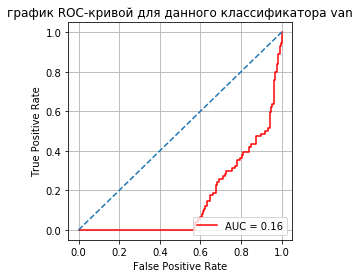

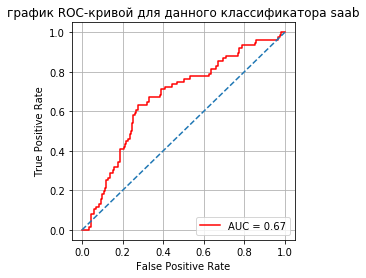

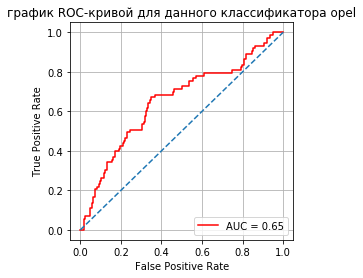

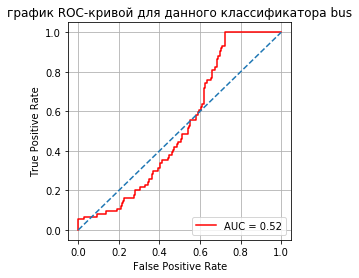

In [364]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#making log reg
lr = LogisticRegression(penalty='l1', C = 0.674, multi_class='auto' )
lr.fit(X_train,y_train)

y_prob = lr.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities
y_predicted = lr.predict(X_test)

for i in ('van','saab','opel','bus') :
    from sklearn.metrics import roc_curve, f1_score, auc
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob, pos_label = i)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    f1_score = f1_score(y_test, y_predicted, average = 'micro')
    print('FOR %s -------------- \nRoc_auc: %s \nF1_score %s\n' % (i, roc_auc, f1_score))
    
    graph = plt.figure(figsize=(4,4))
    x = graph.add_subplot(111)
    x.grid()
    plt.title('график ROC-кривой для данного классификатора %s' % i)
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    x.set_xlabel('False Positive Rate')
    x.set_ylabel('True Positive Rate')
    

#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

In [367]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train)

covariance=pca.get_covariance()
explained_variance=pca.explained_variance_
explained_variance

array([6.95815817e-02, 1.52568310e-02, 1.30412528e-03, 1.00503271e-03,
       5.84806362e-04, 2.24268572e-04, 1.14039400e-04, 8.25009574e-05,
       6.16534940e-05, 4.23501810e-05, 2.54409931e-05, 1.92493452e-05,
       1.61912911e-05, 9.67685564e-06, 5.70326907e-06, 2.85596409e-06,
       2.31787331e-06, 1.05058719e-06, 1.19839081e-07])

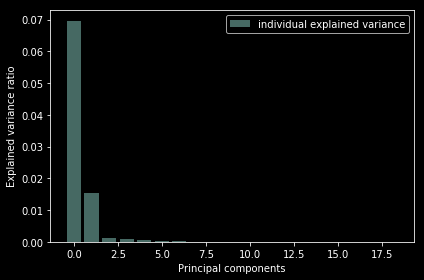

In [368]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(19), explained_variance, alpha=0.5, align='center', label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

* * *
* * *
### We can see that the last 17 components has less amount of variance of the data.The 1st 2 components retains more than 98% of the data.
* * *
* * *

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

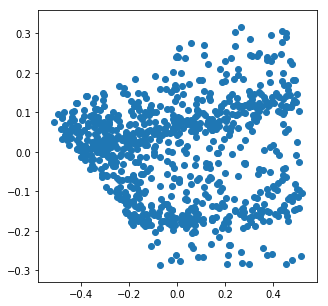

In [389]:
# Есесна мы берём только 1 и 2 компоненты, остальные менее значимы по отношению к ним.
N=data
pca = PCA(n_components=2)
x = pca.fit_transform(N)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

In [390]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x,target,test_size=0.2,random_state=4)

In [371]:
tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
              'penalty':['l1','l2']
                   }

In [372]:
model_LR= LogisticRegression(solver = 'saga')
LR= GridSearchCV(model_LR, tuned_parameters,cv=50)
LR.fit(X_train1,y_train1)
print(LR.best_params_)

{'C': 0.1, 'penalty': 'l2'}


FOR van -------------- 
Roc_auc: 0.18711538461538463 
F1_score 0.35294117647058826

FOR saab -------------- 
Roc_auc: 0.562928165981601 
F1_score 0.35294117647058826

FOR opel -------------- 
Roc_auc: 0.6717827626918536 
F1_score 0.35294117647058826

FOR bus -------------- 
Roc_auc: 0.5533854166666666 
F1_score 0.35294117647058826



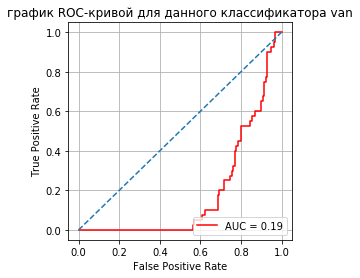

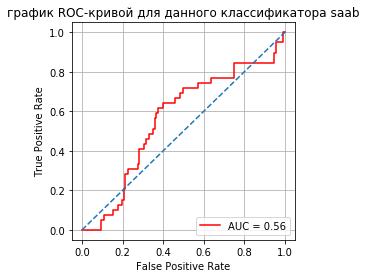

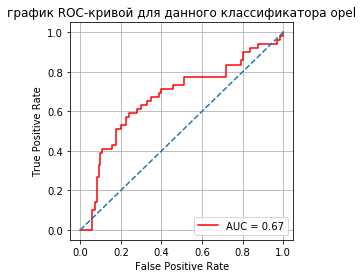

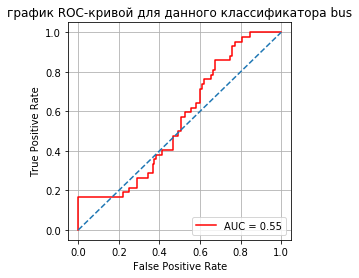

In [391]:
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix
LR_good = LogisticRegression(solver = 'saga', multi_class='auto', C = 0.1, penalty='l2')
LR_good.fit(X_train1,y_train1)

y_prob1 = LR_good.predict_proba(X_test1)[:,1] # This will give you positive class prediction probabilities
y_predicted1 = LR_good.predict(X_test1)

for i in ('van','saab','opel','bus') :
    from sklearn.metrics import roc_curve, f1_score, auc
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_prob1, pos_label = i)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    f1_score = f1_score(y_test1, y_predicted1, average = 'micro')
    print('FOR %s -------------- \nRoc_auc: %s \nF1_score %s\n' % (i, roc_auc, f1_score))
    
    graph = plt.figure(figsize=(4,4))
    x = graph.add_subplot(111)
    x.grid()
    plt.title('график ROC-кривой для данного классификатора %s' % i)
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    x.set_xlabel('False Positive Rate')
    x.set_ylabel('True Positive Rate')
    

In [392]:
confusion_matrix=confusion_matrix(y_test1,y_predicted1)
confusion_matrix

array([[15,  0, 16, 11],
       [ 8,  0, 32,  9],
       [ 5,  0, 22, 12],
       [13,  0,  4, 23]], dtype=int64)

#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [399]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

model_DD = DecisionTreeClassifier()
tuned_parameters= {'criterion': ['gini','entropy'], 'max_features': ["auto","sqrt","log2"],
                   'min_samples_leaf': range(1,100,1) , 'max_depth': range(1,50,1)
                  }
clf = RandomizedSearchCV(model_DD, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1,random_state=5)

res = clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 31, 'criterion': 'entropy'}
0.5664845173041895


# ИСХОДНЫЕ ДАННЫЕ

FOR van -------------- 
Roc_auc: 0.2225796930342385 
F1_score 0.569023569023569

FOR saab -------------- 
Roc_auc: 0.6941916988657608 
F1_score 0.569023569023569

FOR opel -------------- 
Roc_auc: 0.7490926121063106 
F1_score 0.569023569023569

FOR bus -------------- 
Roc_auc: 0.33350990901159167 
F1_score 0.569023569023569



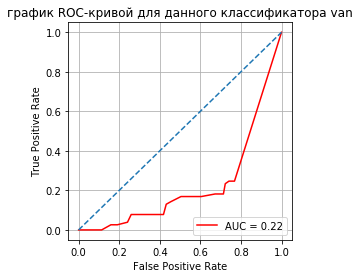

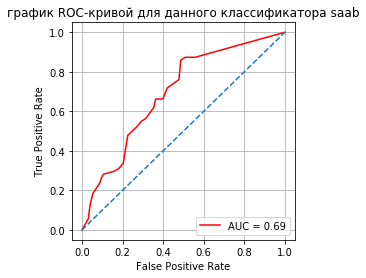

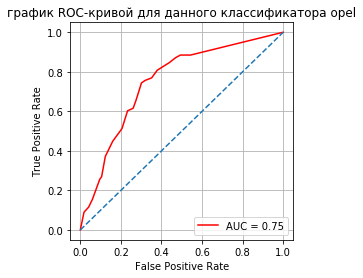

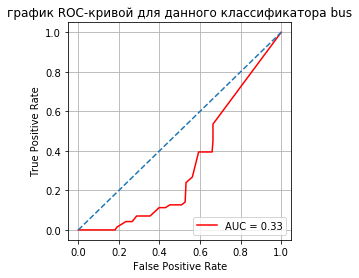

In [393]:
model_tree = DecisionTreeClassifier(min_samples_leaf = 10, max_features =  'log2', max_depth = 31, criterion =  'entropy')
model_tree.fit(X_train, y_train)

y_prob2 = model_tree.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities
y_predicted2 = model_tree.predict(X_test)

for i in ('van','saab','opel','bus') :
    from sklearn.metrics import roc_curve, f1_score, auc
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob2, pos_label = i)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    f1_score = f1_score(y_test, y_predicted2, average = 'micro')
    print('FOR %s -------------- \nRoc_auc: %s \nF1_score %s\n' % (i, roc_auc, f1_score))
    
    graph = plt.figure(figsize=(4,4))
    x = graph.add_subplot(111)
    x.grid()
    plt.title('график ROC-кривой для данного классификатора %s' % i)
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    x.set_xlabel('False Positive Rate')
    x.set_ylabel('True Positive Rate')
    


# Преобразованные данные

In [400]:
model_DD1 = DecisionTreeClassifier()
tuned_parameters1= {'criterion': ['gini','entropy'], 'max_features': ["auto","sqrt","log2"],
                   'min_samples_leaf': range(1,100,1) , 'max_depth': range(1,50,1)
                  }
clf1 = RandomizedSearchCV(model_DD, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1,random_state=5)

res1 = clf1.fit(X_train1, y_train1)
print(clf1.best_params_)
print(clf1.best_score_)

{'min_samples_leaf': 27, 'max_features': 'log2', 'max_depth': 14, 'criterion': 'entropy'}
0.46153846153846156


FOR van -------------- 
Roc_auc: 0.37096153846153845 
F1_score 0.40588235294117647

FOR saab -------------- 
Roc_auc: 0.6494421608925427 
F1_score 0.40588235294117647

FOR opel -------------- 
Roc_auc: 0.6888176758306628 
F1_score 0.40588235294117647

FOR bus -------------- 
Roc_auc: 0.27455357142857145 
F1_score 0.40588235294117647



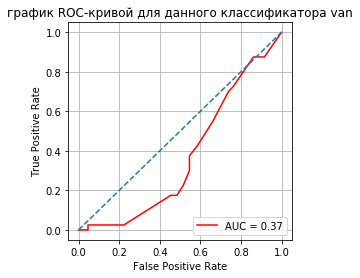

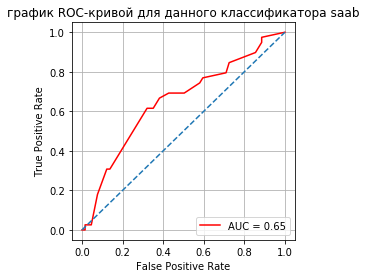

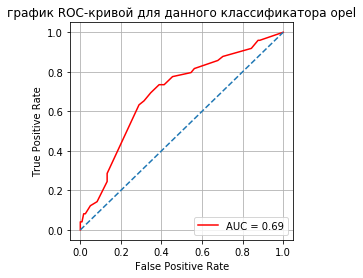

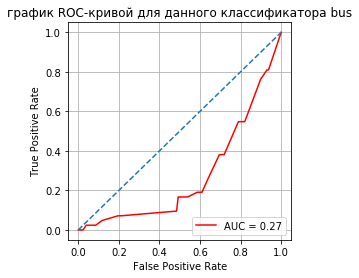

In [402]:
model_tree1 = DecisionTreeClassifier(min_samples_leaf = 3, max_features =  'log2', max_depth = 7, criterion =  'gini')
model_tree1.fit(X_train1, y_train1)

y_prob2 = model_tree1.predict_proba(X_test1)[:,1] # This will give you positive class prediction probabilities
y_predicted2 = model_tree1.predict(X_test1)

for i in ('van','saab','opel','bus') :
    from sklearn.metrics import roc_curve, f1_score, auc
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_prob2, pos_label = i)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    f1_score = f1_score(y_test1, y_predicted2, average = 'micro')
    print('FOR %s -------------- \nRoc_auc: %s \nF1_score %s\n' % (i, roc_auc, f1_score))
    
    graph = plt.figure(figsize=(4,4))
    x = graph.add_subplot(111)
    x.grid()
    plt.title('график ROC-кривой для данного классификатора %s' % i)
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    x.set_xlabel('False Positive Rate')
    x.set_ylabel('True Positive Rate')
    


#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

In [407]:
import numpy as np
def get_bootstrap_samples(data, n_samples):
    # функция для генерации подвыборок с помощью бутстрэпа
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

new_X_train = get_bootstrap_samples(X_train, 50)
new_y_train = get_bootstrap_samples(y_train, 50)


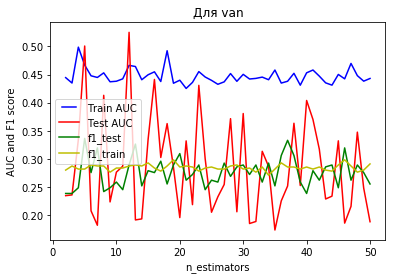

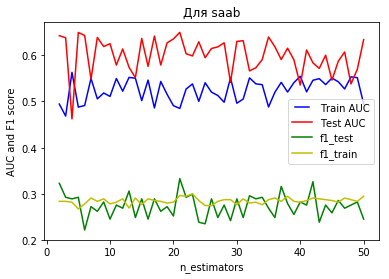

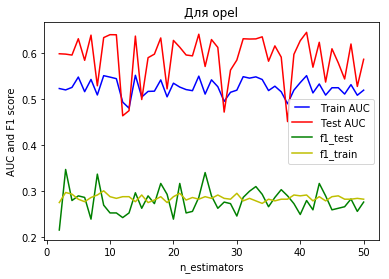

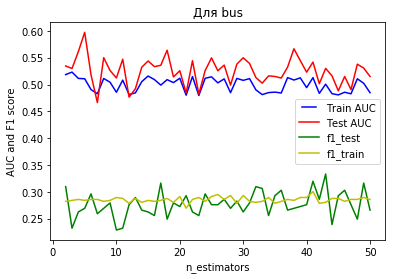

In [424]:
'''
КАЮСЬ! Не успевал обучить на каждой из 50ти подвыборок, а потом усреднить!!!

Сделал только для 37, это почти как 73(любимое число Шелдона), только зеркальное отраженние
'''

from sklearn.ensemble import BaggingClassifier
for i in ('van','saab','opel','bus') :
    train_results = []
    test_results = []
    f1_train = []
    f1_test = []
    for n_estimator in range(2,51):
        lr = LogisticRegression()
        bc = BaggingClassifier(base_estimator=lr, n_estimators= n_estimator)
        bc.fit(new_X_train[37], new_y_train[37])
        new_train_pred = bc.predict(new_X_train[37])
        y_prob_NEW = bc.predict_proba(new_X_train[37])[:,1]
        from sklearn.metrics import roc_curve, f1_score, auc
        f1_train.append(f1_score(new_y_train[37], new_train_pred, average = 'micro'))
        false_positive_rate, true_positive_rate, thresholds = roc_curve(new_y_train[0], y_prob_NEW, pos_label = i)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        train_results.append(roc_auc)
        
        new_test_pred = bc.predict(X_test)
        y_prob_NEW1 = bc.predict_proba(X_test)[:,1]
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_NEW1, pos_label = i)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        test_results.append(roc_auc)
        f1_test.append(f1_score(y_test, new_test_pred, average = 'micro'))
        
        #for_max[accuracy_score(new_y_test[0], y_pred)] = n_estimator
    
    #list_keys = list(for_max.keys())
    #list_keys.sort()
    #print ('!%s! Maximum accuracy %s for %s numbers of alghoritm' % (i,list_keys[-1], for_max[list_keys[-1]]))
    
    from matplotlib.legend_handler import HandlerLine2D
    plt.title('Для %s' % i)
    line1, = plt.plot(range(2,51), train_results, 'b', label='Train AUC')
    line2, = plt.plot(range(2,51), test_results, 'r', label='Test AUC')
    line3, = plt.plot(range(2,51), f1_test, 'g', label='f1_test')
    line4, = plt.plot(range(2,51), f1_train, 'y', label='f1_train')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('AUC and F1 score')
    plt.xlabel('n_estimators')
    plt.show()

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

!van! Maximum accuracy 0.7037037037037037 for 38 trees


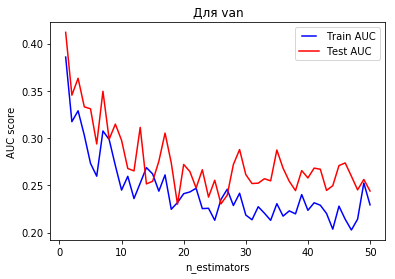

!saab! Maximum accuracy 0.7070707070707071 for 21 trees


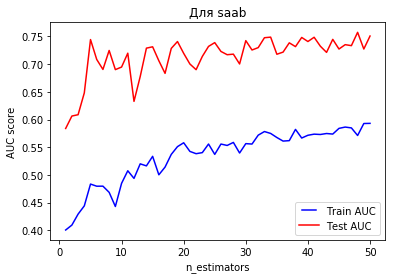

!opel! Maximum accuracy 0.7138047138047138 for 22 trees


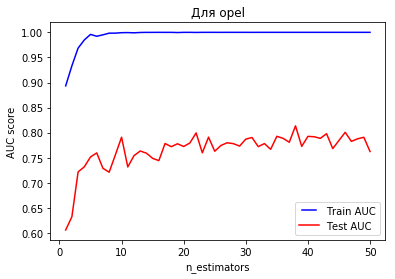

!bus! Maximum accuracy 0.7171717171717171 for 32 trees


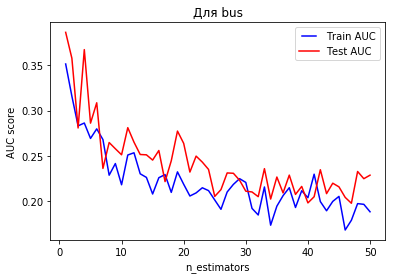

In [404]:
from sklearn.ensemble import RandomForestClassifier

for i in ('van','saab','opel','bus') :
    train_results = []
    test_results = []
    for_max = {}
    for estimator in range(1,51):
        model_RR=RandomForestClassifier(n_estimators = estimator)
        res = model_RR.fit(X_train,y_train)
        train_pred = model_RR.predict(X_train)
        y_prob_new = model_RR.predict_proba(X_train)[:,1]
        from sklearn.metrics import roc_curve, f1_score, auc
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_prob_new, pos_label = i)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        train_results.append(roc_auc)
        y_pred = model_RR.predict(X_test)
        y_prob_new1 = model_RR.predict_proba(X_test)[:,1]
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_new1, pos_label = i)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        test_results.append(roc_auc)
        
        for_max[accuracy_score(y_test, y_pred)] = estimator
    
    list_keys = list(for_max.keys())
    list_keys.sort()
    print ('!%s! Maximum accuracy %s for %s trees' % (i,list_keys[-1], for_max[list_keys[-1]]))
    
    from matplotlib.legend_handler import HandlerLine2D
    plt.title('Для %s' % i)
    line1, = plt.plot(range(1,51), train_results, 'b', label='Train AUC')
    line2, = plt.plot(range(1,51), test_results, 'r', label='Test AUC')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('AUC score')
    plt.xlabel('n_estimators')
    plt.show()

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

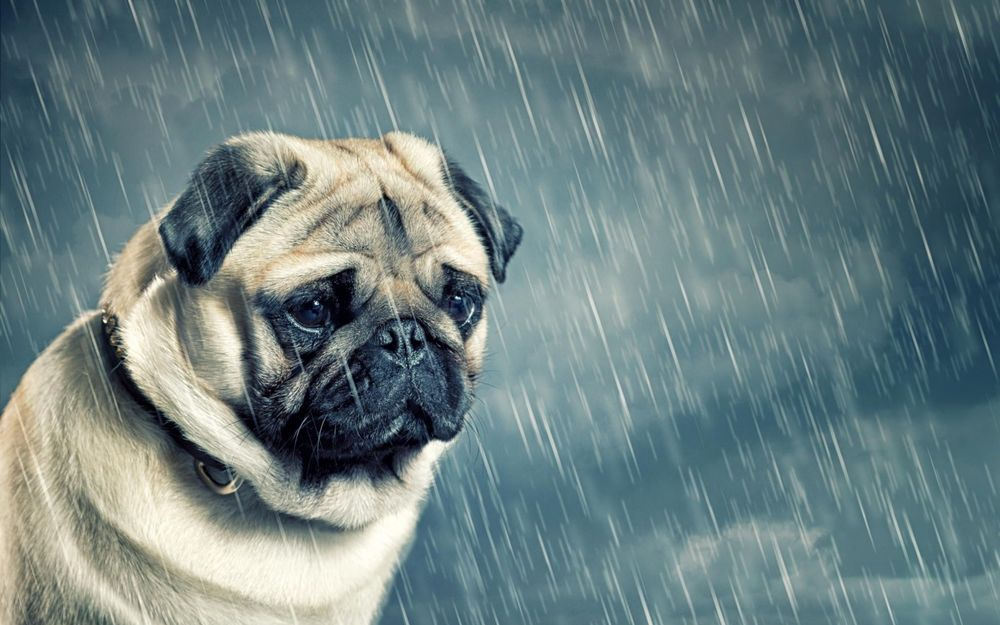

In [422]:
# Не сделал этот пункт :(
from IPython.display import Image
Image("../../sad_pug.jpg")

Вторая часть задания про SVM ждет вас в соседнем ноутбуке.